In [ ]:
#importing the required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
import pydot

In [ ]:
## creating a data_mnist dataset so that we can work on the data
digit_mnist = keras.datasets.mnist
(X_train_full , Y_train_full), (X_test, Y_test)= digit_mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


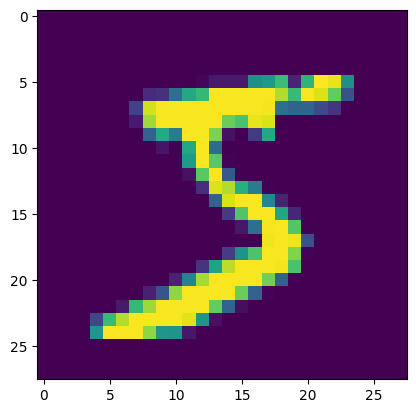

In [ ]:
##preview of how data looks like
plt.imshow(X_train_full[0])

In [ ]:
print(Y_train_full)

[5 0 4 ... 5 6 8]


In [ ]:
#defining the function to normalize the data

def normalization(data):
  d_max = max(data)
  d_min = min(data)
  norm = ((x - d_min) /(d_max - d_min) for x in data)
  return norm

data = (X_train_full ,Y_train_full)



In [ ]:
## Normalization of the data
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.


In [ ]:
## spliting up the validation data from the training set
X_valid , X_train = X_train_n[:6000],X_train_n[6000:]
Y_valid , Y_train = Y_train_full[:6000], Y_train_full[6000:]
X_test_n = X_test

In [ ]:
model1 = tensorflow.keras.Sequential()
model1.add(keras.layers.Flatten(input_shape = [28,28]))
model1.add(keras.layers.Dense(200, activation = "relu"))
model1.add(keras.layers.Dense(100 , activation = "relu"))
model1.add(keras.layers.Dense(10,activation = "softmax"))



In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178110 (695.74 KB)
Trainable params: 178110 (695.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


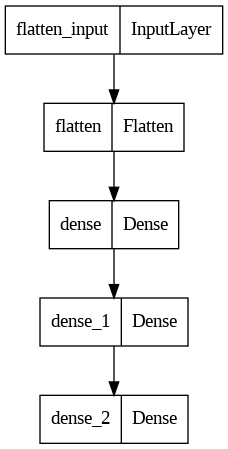

In [ ]:
keras.utils.plot_model(model1)

In [ ]:
weights , biases = model1.layers[1].get_weights()
weights.shape

(784, 200)

In [ ]:
model1.compile(loss = "sparse_categorical_crossentropy",
                               optimizer = "sgd" ,
                               metrics = ["accuracy"])

In [ ]:
model_history = model1.fit(X_train , Y_train , epochs = 60 ,validation_data =( X_valid , Y_valid) , verbose='auto')

Epoch 1/60
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0080 - accuracy: 0.9994 - val_loss: 0.0799 - val_accuracy: 0.9785
Epoch 2/60
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0077 - accuracy: 0.9995 - val_loss: 0.0812 - val_accuracy: 0.9782
Epoch 3/60
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0073 - accuracy: 0.9996 - val_loss: 0.0807 - val_accuracy: 0.9785
Epoch 4/60
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0071 - accuracy: 0.9996 - val_loss: 0.0808 - val_accuracy: 0.9780
Epoch 5/60
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0068 - accuracy: 0.9996 - val_loss: 0.0801 - val_accuracy: 0.9785
Epoch 6/60
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0066 - accuracy: 0.9996 - val_loss: 0.0832 - val_accuracy: 0.9773
Epoch 7/60
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0064 - accuracy: 0.9997 - val_loss: 0.0822 - val_accuracy:

In [ ]:
model_history.params

{'verbose': 1, 'epochs': 60, 'steps': 1688}

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

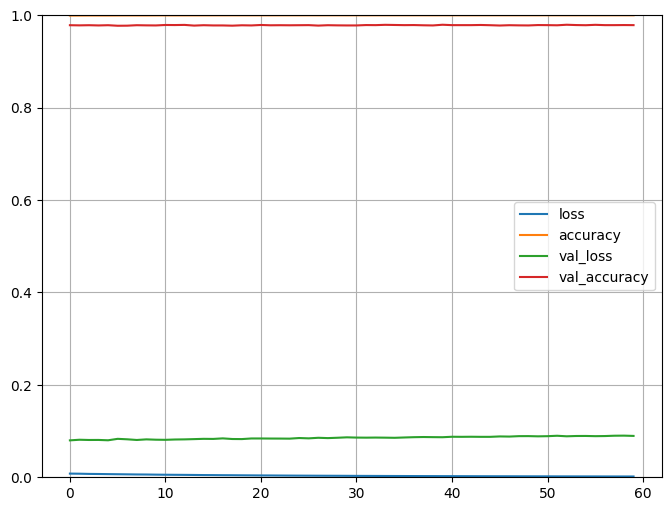

In [ ]:
pd.DataFrame(model_history.history).plot(figsize = [8,6])
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.imshow

In [ ]:
model1.evaluate(X_test , Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 24.5289 - accuracy: 0.9734


[24.5289249420166, 0.9733999967575073]

In [ ]:
X_new = X_test[:3]

In [ ]:
y_prob = model1.predict(X_new)
y_prob.round(2)

1/1 [==============================] - 0s 99ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = np.argmax(model1.predict(X_new), axis = 1)
y_pred

1/1 [==============================] - 0s 33ms/step


array([7, 2, 1])

In [ ]:
np.array(y_pred)

array([7, 2, 1])

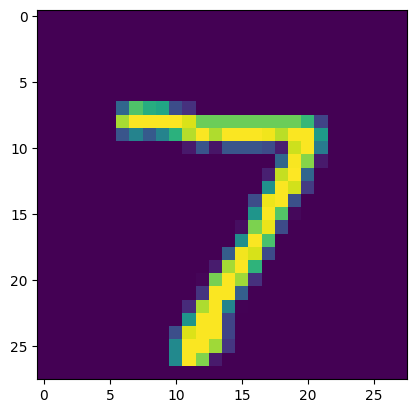

In [ ]:
plt.imshow(X_new[0])